# XGBoost models for 1, 3, 5 and 10 time windows

## Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, roc_curve
from sklearn.utils import resample

import xgboost as xgb
from xgboost import plot_importance

## Directory

In [2]:
os.chdir("/rds/general/project/hda_students_data/live/Group9/General/Data/Final_final_final_datasets")

## Load in data

In [3]:
data_1yr_train = pd.read_csv("train_1yr_hesin_pca.csv")
data_1yr_test = pd.read_csv("test_1yr_hesin_pca.csv")

data_3yr_train = pd.read_csv("train_3yr_hesin_pca.csv")
data_3yr_test = pd.read_csv("test_3yr_hesin_pca.csv")

data_5yr_train = pd.read_csv("train_5yr_hesin_pca.csv")
data_5yr_test = pd.read_csv("test_5yr_hesin_pca.csv")

data_10yr_train = pd.read_csv("train_10yr_hesin_pca.csv")
data_10yr_test = pd.read_csv("test_10yr_hesin_pca.csv")

#### Check shapes

In [4]:
print(data_1yr_train.shape)
print(data_1yr_test.shape)

print(data_3yr_train.shape)
print(data_3yr_test.shape)

print(data_5yr_train.shape)
print(data_5yr_test.shape)

print(data_10yr_train.shape)
print(data_10yr_test.shape)

(11517, 1231)
(3839, 1231)
(11517, 1467)
(3839, 1467)
(11517, 1549)
(3839, 1549)
(11517, 1663)
(3839, 1663)


## Balance training datasets

In [5]:
print(data_1yr_train["casecont"].value_counts())
print(data_3yr_train["casecont"].value_counts())
print(data_5yr_train["casecont"].value_counts())
print(data_10yr_train["casecont"].value_counts())

0    7657
1    3860
Name: casecont, dtype: int64
0    7657
1    3860
Name: casecont, dtype: int64
0    7657
1    3860
Name: casecont, dtype: int64
0    7657
1    3860
Name: casecont, dtype: int64


In [6]:
data_1yr_train_maj = data_1yr_train[data_1yr_train["casecont"] == 0]
data_1yr_train_min = data_1yr_train[data_1yr_train["casecont"] == 1]

data_1yr_train_min_upsampled = resample(data_1yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_1yr_train = pd.concat([data_1yr_train_maj, data_1yr_train_min_upsampled])

In [7]:
data_3yr_train_maj = data_3yr_train[data_3yr_train["casecont"] == 0]
data_3yr_train_min = data_3yr_train[data_3yr_train["casecont"] == 1]

data_3yr_train_min_upsampled = resample(data_3yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_3yr_train = pd.concat([data_3yr_train_maj, data_3yr_train_min_upsampled])

In [8]:
data_5yr_train_maj = data_5yr_train[data_5yr_train["casecont"] == 0]
data_5yr_train_min = data_5yr_train[data_5yr_train["casecont"] == 1]

data_5yr_train_min_upsampled = resample(data_5yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_5yr_train = pd.concat([data_5yr_train_maj, data_5yr_train_min_upsampled])

In [9]:
data_10yr_train_maj = data_10yr_train[data_10yr_train["casecont"] == 0]
data_10yr_train_min = data_10yr_train[data_10yr_train["casecont"] == 1]

data_10yr_train_min_upsampled = resample(data_10yr_train_min, replace = True, n_samples = 7657, random_state = 289)

data_10yr_train = pd.concat([data_10yr_train_maj, data_10yr_train_min_upsampled])

In [10]:
print(data_1yr_train["casecont"].value_counts())
print(data_3yr_train["casecont"].value_counts())
print(data_5yr_train["casecont"].value_counts())
print(data_10yr_train["casecont"].value_counts())

1    7657
0    7657
Name: casecont, dtype: int64
1    7657
0    7657
Name: casecont, dtype: int64
1    7657
0    7657
Name: casecont, dtype: int64
1    7657
0    7657
Name: casecont, dtype: int64


## Create X and Y

In [11]:
X_train_1yr = data_1yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_1yr = data_1yr_train["casecont"]

X_test_1yr = data_1yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_1yr = data_1yr_test["casecont"]

X_train_3yr = data_3yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_3yr = data_3yr_train["casecont"]

X_test_3yr = data_3yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_3yr = data_3yr_test["casecont"]

X_train_5yr = data_5yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_5yr = data_5yr_train["casecont"]

X_test_5yr = data_5yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_5yr = data_5yr_test["casecont"]

X_train_10yr = data_10yr_train.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_train_10yr = data_10yr_train["casecont"]

X_test_10yr = data_10yr_test.drop(["Unnamed: 0", "eid", "casecont"], axis = 1)
Y_test_10yr = data_10yr_test["casecont"]

In [12]:
print(X_train_1yr.shape)
print(Y_train_1yr.shape) 

print(X_test_1yr.shape)
print(Y_test_1yr.shape) 

print(X_train_3yr.shape)
print(Y_train_3yr.shape) 

print(X_test_3yr.shape)
print(Y_test_3yr.shape) 

print(X_train_5yr.shape)
print(Y_train_5yr.shape) 

print(X_test_5yr.shape)
print(Y_test_5yr.shape) 

print(X_train_10yr.shape)
print(Y_train_10yr.shape) 

print(X_test_10yr.shape)
print(Y_test_10yr.shape) 

(15314, 1228)
(15314,)
(3839, 1228)
(3839,)
(15314, 1464)
(15314,)
(3839, 1464)
(3839,)
(15314, 1546)
(15314,)
(3839, 1546)
(3839,)
(15314, 1660)
(15314,)
(3839, 1660)
(3839,)


## XGBoost Models

#### Baseline models

In [13]:
model_1yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_1yr.fit(X_train_1yr, Y_train_1yr)
model_1yr.score(X_test_1yr, Y_test_1yr)

0.683511331075801

In [14]:
model_3yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_3yr.fit(X_train_3yr, Y_train_3yr)
model_3yr.score(X_test_3yr, Y_test_3yr)

0.6829903620734566

In [15]:
model_5yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_5yr.fit(X_train_5yr, Y_train_5yr)
model_5yr.score(X_test_5yr, Y_test_5yr)

0.677780672050013

In [16]:
model_10yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, min_child_weight = 6, subsample = 0.5)
model_10yr.fit(X_train_10yr, Y_train_10yr)
model_10yr.score(X_test_10yr, Y_test_10yr)

0.6827298775722844

## Plot the ROC curves

#### This is the code to build the roc curve plot, will need more results obviously, but shouldn't take too long to extend this code!

In [17]:
result_table = pd.DataFrame(columns=['Time window', 'fpr','tpr','auc'])

In [18]:
yproba = model_1yr.predict_proba(X_test_1yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_1yr,  yproba)
auc = roc_auc_score(Y_test_1yr, yproba)

result_table = result_table.append({'Time window':"1 year",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [19]:
yproba = model_3yr.predict_proba(X_test_3yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_3yr,  yproba)
auc = roc_auc_score(Y_test_3yr, yproba)

result_table = result_table.append({'Time window':"3 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [20]:
yproba = model_5yr.predict_proba(X_test_5yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_5yr,  yproba)
auc = roc_auc_score(Y_test_5yr, yproba)

result_table = result_table.append({'Time window':"5 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [21]:
yproba = model_10yr.predict_proba(X_test_10yr)[::,1]
fpr, tpr, _ = roc_curve(Y_test_10yr,  yproba)
auc = roc_auc_score(Y_test_10yr, yproba)

result_table = result_table.append({'Time window':"10 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

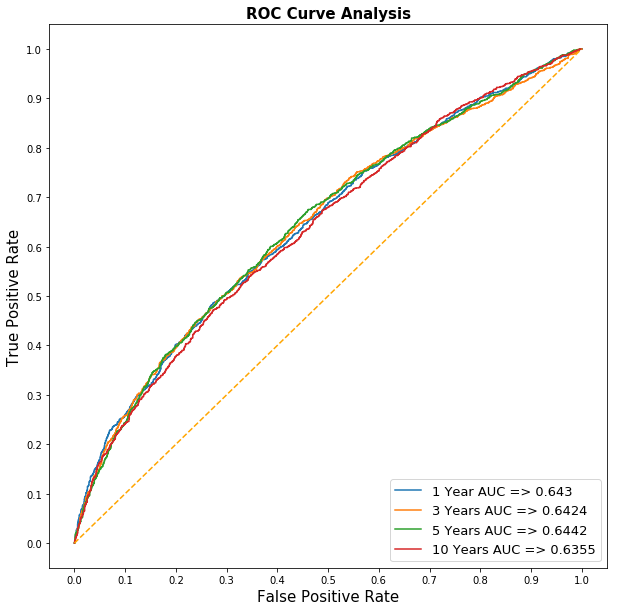

In [22]:
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(result_table.fpr[0], result_table.tpr[0], label="1 Year AUC => " + str(round(result_table.auc[0], 4)))
plt.plot(result_table.fpr[1], result_table.tpr[1], label="3 Years AUC => " + str(round(result_table.auc[1], 4)))
plt.plot(result_table.fpr[2], result_table.tpr[2], label="5 Years AUC => " + str(round(result_table.auc[2], 4)))
plt.plot(result_table.fpr[3], result_table.tpr[3], label="10 Years AUC => " + str(round(result_table.auc[3], 4)))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Extract important features

#### 1 Year

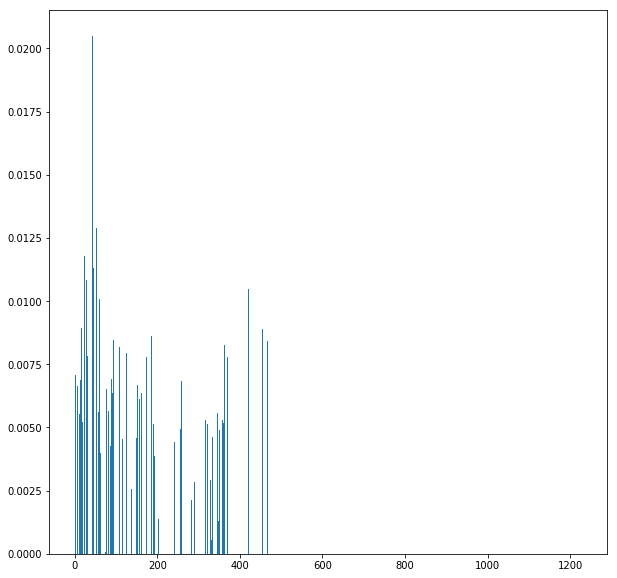

In [23]:
plt.bar(range(len(model_1yr.feature_importances_)), model_1yr.feature_importances_)
plt.show()

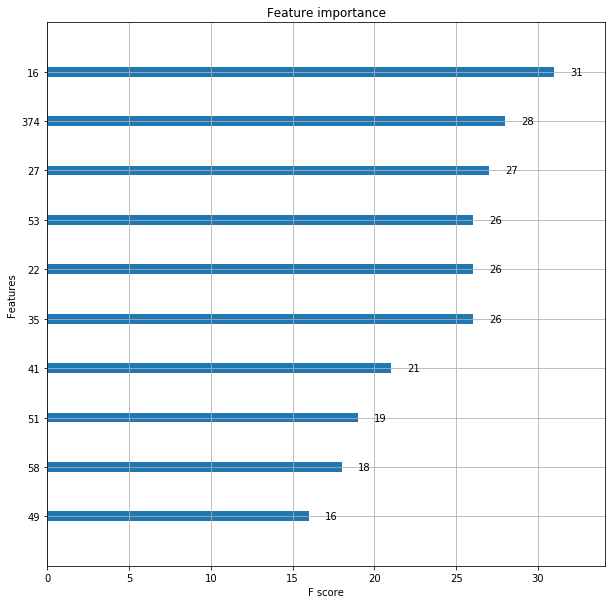

In [24]:
plot_importance(model_1yr, max_num_features=10)
plt.show()

#### 3 Years

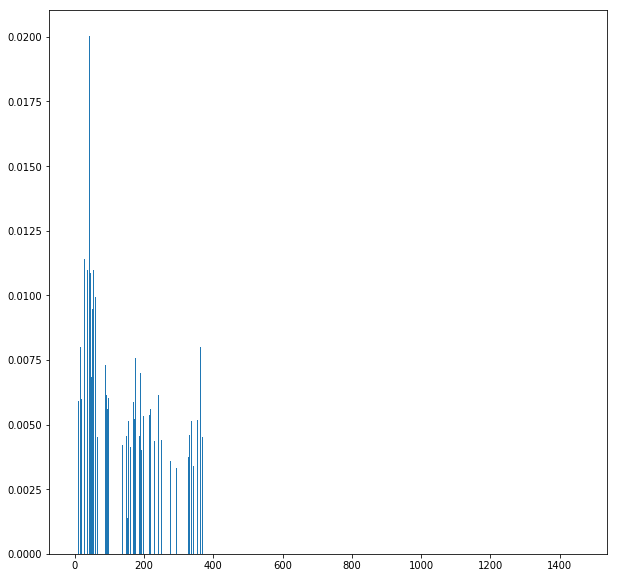

In [25]:
plt.bar(range(len(model_3yr.feature_importances_)), model_3yr.feature_importances_)
plt.show()

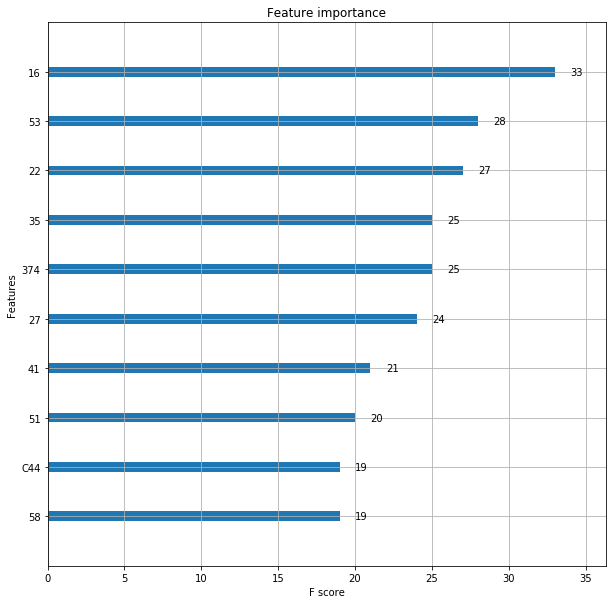

In [26]:
plot_importance(model_3yr, max_num_features=10)
plt.show()

#### 5 Years

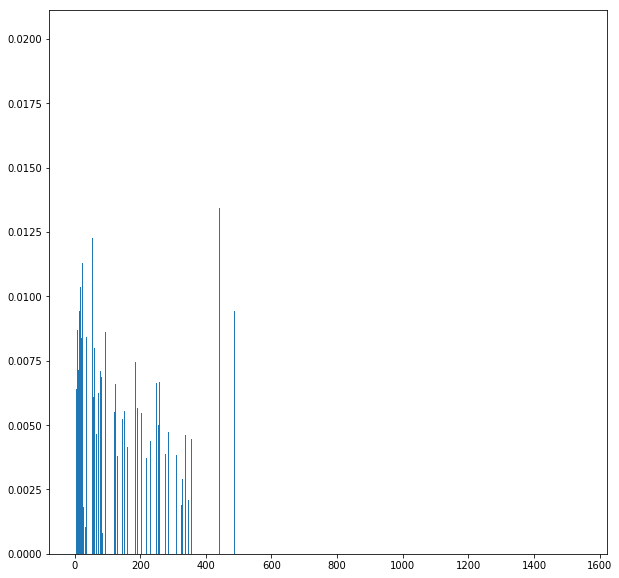

In [27]:
plt.bar(range(len(model_5yr.feature_importances_)), model_5yr.feature_importances_)
plt.show()

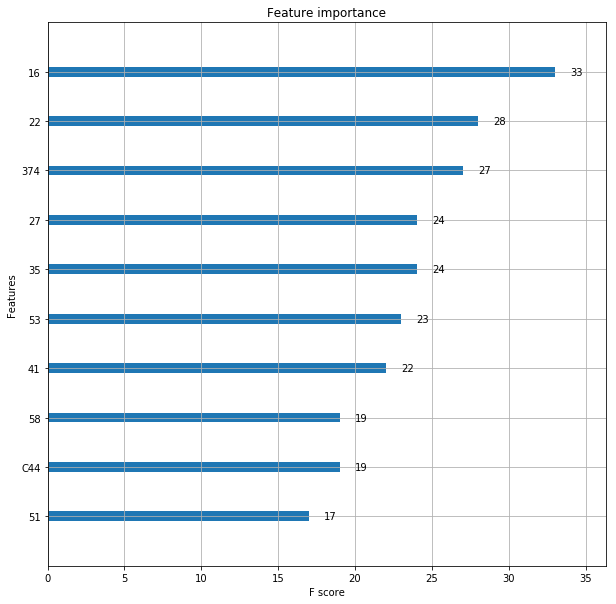

In [28]:
plot_importance(model_5yr, max_num_features=10)
plt.show()

#### 10 Years

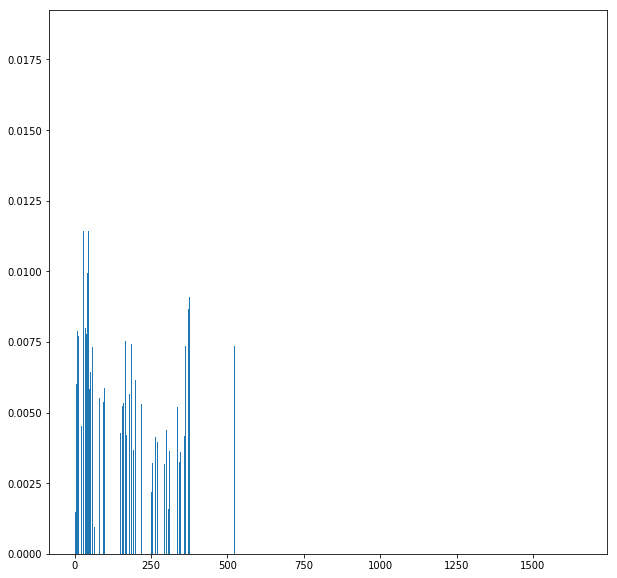

In [29]:
plt.bar(range(len(model_10yr.feature_importances_)), model_10yr.feature_importances_)
plt.show()

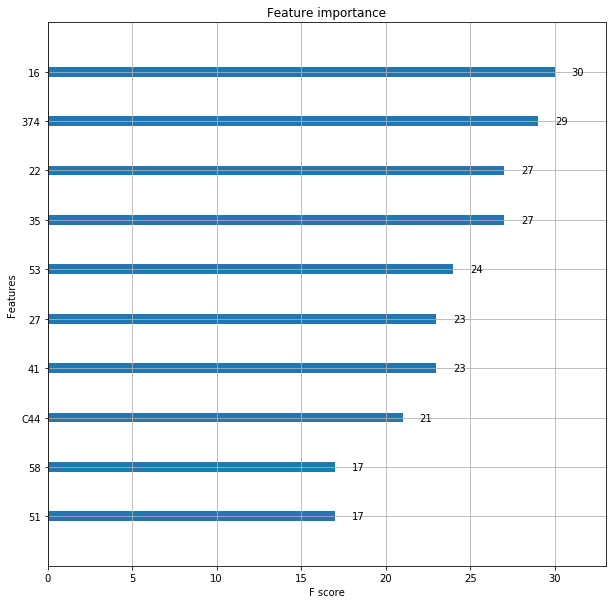

In [30]:
plot_importance(model_10yr, max_num_features=10)
plt.show()